In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\user\AppData\Local\Temp\ipykernel_17052\3263264252.py:3: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [3]:
sanbul = pd.read_excel('C:\project22\sanbul.xls'
                       , sheet_name = "Sheet1")

# 열 이름이 되야할 데이터 추출
index_fix = sanbul.loc[1]

# 열이름 변경
sanbul.columns = index_fix

# 필요없는 행 제거
sanbul = sanbul.drop([0, 1])

# 년 월 일 합치기?
# 날짜 데이터와 형태 같게 만들기 yyyy-mm-dd
sanbul['tm'] = sanbul['발생일시_년'] + '-' + sanbul['발생일시_월'] + '-' + sanbul['발생일시_일']

# 발생장소_시도 = 강원, 경북, 울진만 추출

condition = (sanbul.발생장소_시도 == '경북') |(sanbul.발생장소_시도 == '강원')
sanbul_region = sanbul[condition]

In [4]:
sanbul_region.columns

Index(['발생일시_년', '발생일시_월', '발생일시_일', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시도', '발생장소_시군구',
       '발생장소_읍면', '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', '피해면적_합계',
       'tm'],
      dtype='object', name=1)

In [5]:
sanbul_ca_list = set(sanbul_region['발생원인_구분'])
sanbul_ca_list = list(sanbul_ca_list)

In [6]:
sanbul_ca_list

['담', '건', '입', '기', '쓰']

In [7]:
data = sanbul_region.groupby('발생원인_구분').count()
data.reset_index(inplace=True, drop = True)

In [8]:
data['tm']

0     84
1    674
2     67
3    174
4    523
Name: tm, dtype: int64

([<matplotlib.patches.Wedge at 0x26658f37670>,
 [Text(1.0835068580908644, 0.18977062067154493, '담'),
  Text(-0.18305755153453485, 1.0846612064724086, '건'),
  Text(-1.091291990247388, -0.13813685975109927, '입'),
  Text(-0.8931107728349788, -0.6421472941982294, '기'),
  Text(0.5189117888624846, -0.9699126534794442, '쓰')],
 [Text(0.5910037407768352, 0.1035112476390245, '5.5%'),
  Text(-0.09984957356429174, 0.5916333853485864, '44.3%'),
  Text(-0.5952501764985753, -0.07534737804605414, '4.4%'),
  Text(-0.48715133063726107, -0.3502621604717614, '11.4%'),
  Text(0.28304279392499154, -0.5290432655342422, '34.4%')])

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWa

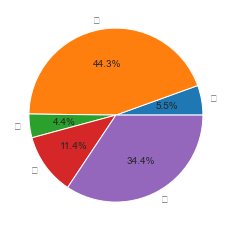

In [9]:
data = sanbul_region.groupby('발생원인_구분').count()
data.reset_index(inplace=True,  drop = True)
data = data['tm']
# data.reset_index(inplace=True)

color = sns.color_palette('tab10')
labels = sanbul_ca_list
sns.set_style('darkgrid')

plt.pie(data, colors = color, labels= labels,autopct = '%1.1f%%')

In [10]:
data

0     84
1    674
2     67
3    174
4    523
Name: tm, dtype: int64